<div class="alert alert-block alert-info">
    <p><b>Курс: </b>Машинное обучение и управление проектами в IT для преподавателей</p>
    <p><b>Тема: </b>2. Работа с данными</p>
</div>

# Важно!

Придерживайтесь эталонного вывода в коде каждого задания, чтобы избежать расхождений в трактовках условий задания.

In [1]:
# загрузим библиотеки
import numpy as np
import pandas as pd

## Задание 1

Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [2]:
a = np.array(range(1, 101), int).reshape((10, 10))
a[::2,::2]

array([[ 1,  3,  5,  7,  9],
       [21, 23, 25, 27, 29],
       [41, 43, 45, 47, 49],
       [61, 63, 65, 67, 69],
       [81, 83, 85, 87, 89]])

## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов. (Для соответсвия примеру вывода используйте длину length = 100_000_000)

Реализуйте задачу с и без помощи numpy, сравните время выполнения

Используйте выражение 


`%%time` 

в первой строчке ячейки кода для отображения времени выполнения ячейки

Если возникамют ошибки с %%time - используйте код

`
from datetime import datetime
start_time = datetime.now()
---ваш код---
print(datetime.now() - start_time)
`

In [3]:
# решение с использованием numpy
# для оценки времени исоплнения блока
# %%time

from datetime import datetime

# зададим длину нашей последовательности
length = 100_000_000

# ваш код тут
start_time = datetime.now()
mean_np = np.array(range(length)).mean()
print(f'Среднее арифметическое последовательности {mean_np}')
print(datetime.now() - start_time)

Среднее арифметическое последовательности 49999999.5
0:00:14.352482


In [4]:
# решение без использования numpy
# для оценки времени исоплнения блока
#%%time

# ваш код тут
start_time = datetime.now()
mean_nonnp = sum(list(range(length))) / length
print(f'Среднее арифметическое последовательности {mean_nonnp}')
print(datetime.now() - start_time)    

Среднее арифметическое последовательности 49999999.5
0:00:05.229300


Если все сделано верно, то можно заметить, что у нампай скорость выполнения (total: 546 ms) заметно выше питона (total: 16.2 s)

## Задание 3

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

Изначальный код:

`
r = np.random.RandomState(1)
s=pd.Series(r.uniform(0, 10, 100))
`

In [5]:
# задано изначально
# генерируем один и тот же список
r = np.random.RandomState(1)
s=pd.Series(r.uniform(0, 10, 100))

# ваш код тут
s.sort_values()[s > 5].index[0]

67

## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен. Важно! Графики решений других слушателей могут незначительно отличаться из-за генерации случайных пропусков.


```

# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None

# ваш код тут
# список а содержит пропуски, его надо восстановить

# ВАШ КОД ТУТ

# отобразим
plt.plot(a)

```

Реализация используя python

In [6]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None

# ваш код тут
# список а содержит пропуски, его надо восстановить

for i, e in enumerate(np.isnan(a)):
    if e:
        a[i] = a[i - 1]

# отобразим
plt.plot(a)
plt.show()

<Figure size 640x480 with 1 Axes>

Реализация через matplotlib

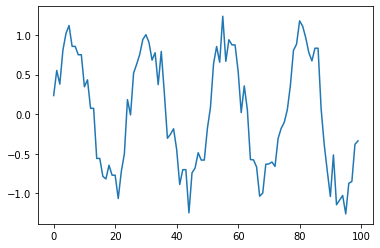

In [7]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None

# создадим датафрейм из списка а, он содержит пропуски
df = pd.DataFrame({'target':a})

# ВАШ КОД ТУТ
df.fillna(method='ffill', inplace=True)

# отобразим
plt.plot(df.target.values)
plt.show()

In [8]:
# то, что будет до (графики могут незначительно отличаться)

In [9]:
# после (графики могут незначительно отличаться)

## Задание 5

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [10]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

# Ваш код по обработке тут
df

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
1,Вася,26,80000,0.74,муж
2,Аня,41,150000,0.87,жен
3,Света,21,60000,0.68,жен


In [11]:
print('старше 40:')
df[df['возраст'] > 40]

старше 40:


,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [12]:
print('имеет доход выше среднего по датасету:')
df[df['доход'] > df['доход'].mean()]

имеет доход выше среднего по датасету:


,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [13]:
print('имеет доход выше среднего по датасету, но надежность ниже среднего по датасету:')
df[(df['доход'] > df['доход'].mean()) & (df['надежность клиента (0..1)'] < df['надежность клиента (0..1)'].mean())]

имеет доход выше среднего по датасету, но надежность ниже среднего по датасету:


,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж


In [14]:
df['важность клиента'] = df['доход'] * df['надежность клиента (0..1)']
df['возможная долгосрочность клиента'] = df['важность клиента'] * (df['возраст'].mean() - df['возраст'])
df

,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


## Задание 6

Используя материалы блока Exploratory data analysis материалов 2го модуля вывести имена всех выживших детей (до 18 лет) и их количество

Изначальный код:

data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

data.head()

In [15]:
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [16]:
# отображаем количество выживших детей

# ваш код тут
survived_children = data[(data['Survived'] == 1) & (data['Age'] < 18)]
len(survived_children)

65

In [17]:
# отображаем их имена

# ваш код тут
survived_children['Name']

9                     Mrs. Nicholas (Adele Achem) Nasser
10                        Miss. Marguerite Rut Sandstrom
22                                    Miss. Anna McGowan
39                            Miss. Jamila Nicola-Yarred
42               Miss. Simonne Marie Anne Andree Laroche
57                           Miss. Constance Mirium West
64                               Master. Gerios Moubarek
67                        Miss. Erna Alexandra Andersson
77                          Master. Alden Gates Caldwell
83                                    Miss. Bertha Ilett
124                          Master. Elias Nicola-Yarred
127                                     Miss. Anna Peter
155                              Miss. Katherine Gilnagh
164                 Master. Frank John William Goldsmith
171                          Miss. Eleanor Ileen Johnson
182                             Master. Richard F Becker
183                   Miss. Luise Gretchen Kink-Heilmann
192                            